In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 Wisconsin Breast Cancer Data
## Read the data

In [4]:
# Load the Data of Wisconsin Breast Cancer
# Id: Subject ID
# V1 - V9: Attributes
# Class: Diagnosis, 4 = malignant, 2 = benign
dataBreastCancer = pd.read_csv("session4_homework4.csv",header=None)
dataBreastCancer.columns = ['Id','V1','V2','V3','V4','V5','V6','V7','V8','V9','Class']

In [11]:
# By printing the info of our data, we can see the V5 variable is object
# Which means V6 have '?' in rows and we need to fix that
print(dataBreastCancer.info())
# Count the number of '?'
print('The number of missing values "?" is:%d' % len(dataBreastCancer.loc[dataBreastCancer['V6']=='?']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Id       699 non-null int64
V1       699 non-null int64
V2       699 non-null int64
V3       699 non-null int64
V4       699 non-null int64
V5       699 non-null int64
V6       699 non-null object
V7       699 non-null int64
V8       699 non-null int64
V9       699 non-null int64
Class    699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None
The number of missing values "?" is:16


In [6]:
# The dimension of the BreastData is:
print('The dimension of the dataset is:', dataBreastCancer.shape)

The dimension of the dataset is: (699, 11)


In [7]:
# And the number of malignant diagnoses is:
mali_num = sum(dataBreastCancer['Class']==4)
print('The number of malignant diagnoses is %d' % mali_num)
print('And the percentage of the malignant diagnoses is: ', mali_num/dataBreastCancer.shape[0])

The number of malignant diagnoses is 241
And the percentage of the malignant diagnoses is:  0.344778254649


In [45]:
# After observing the '?' variable, we delete the row contains '?'
# dataset is the data we use for random forest 
del_data = dataBreastCancer.loc[dataBreastCancer['V6']=='?'].index
dataset = dataBreastCancer
for i in del_data:
    dataset = dataset.drop(i)
#dataBreastCancer
len(dataset)

683

In [46]:
dataset.V6 = pd.to_numeric(dataset['V6'])
dataset.info()
# Now all the data are numeric including V6

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
Id       683 non-null int64
V1       683 non-null int64
V2       683 non-null int64
V3       683 non-null int64
V4       683 non-null int64
V5       683 non-null int64
V6       683 non-null int64
V7       683 non-null int64
V8       683 non-null int64
V9       683 non-null int64
Class    683 non-null int64
dtypes: int64(11)
memory usage: 64.0 KB


## Fit classification tree

In [65]:
from sklearn.cross_validation import train_test_split
dataset = dataset.reset_index()
X_train, X_test, Y_train,Y_test = train_test_split(dataset[['V1','V2','V3','V4','V5','V6','V7','V8','V9']], dataset.Class, test_size=0.3, random_state=0)

In [66]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [67]:
print(clf.feature_importances_)

[ 0.          0.31155666  0.09654081  0.00546975  0.11775687  0.13656816
  0.25267076  0.07943699  0.        ]


In [80]:
from sklearn import tree
import pydotplus
from IPython.display import Image
from sklearn.externals.six import StringIO

In [85]:
dtr = tree.DecisionTreeRegressor(max_depth=3)
dtr.fit(X_train, Y_train)
dot_data = StringIO()
tree.export_graphviz(dtr, out_file=dot_data,
                     feature_names=X_train.columns,
                     class_names=['2','4'],
                     filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("BreastCancerTree.pdf")
# It came out an error which showed: GraphViz's executables not found
# To solve this, I had to install GraphViz on my computer
# Cuz it's mac. Just type 'brew install graphviz' on terminal solve the problem

True

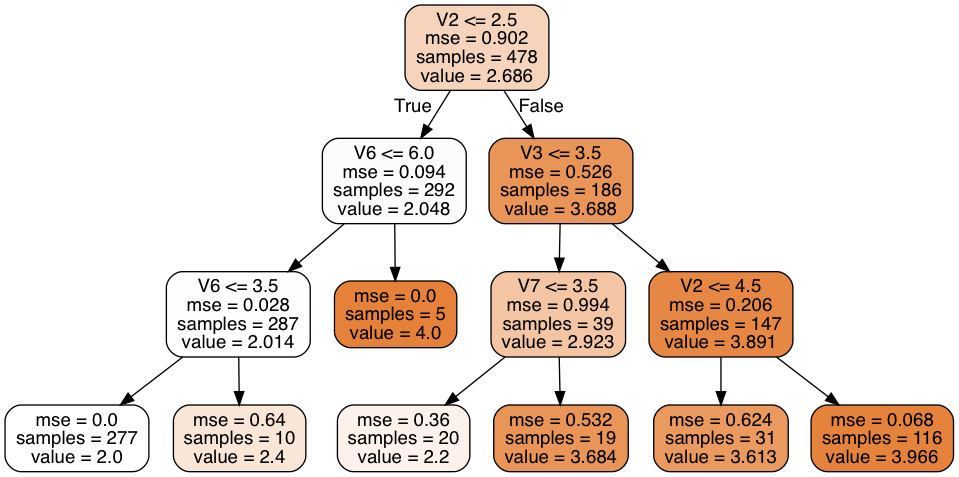

In [86]:
Image(graph.create_png())

# Time series of stock prices
## Read the file

In [94]:
SPYPortf = pd.read_csv('spyPortfolio.csv')
SPYPortf.head()

,SPLS.A,MTB.A,UNM.A,VLO.A,AMZN.A,ADBE.A,CSX.A,PG.A,CMA.A,PEP.A,...,TMK.A,MU.A,AABA.A,MON.A,AKAM.A,HSY.A,BAC.A,WDC.A,EL.A,SPY.A
0,13.358053,106.356094,31.958076,44.677620,397.970001,59.290001,26.069447,71.506683,44.108505,74.317741,...,51.619999,21.660000,39.590000,108.231735,46.529999,88.486427,15.449621,75.437431,70.423569,170.514297
1,13.529419,106.494751,31.967392,44.211758,396.440002,59.160000,26.235554,71.426781,44.325039,74.444466,...,51.720001,20.969999,40.119999,108.268967,46.450001,88.375725,15.747098,75.984871,70.366249,170.486343
2,13.135275,106.161972,31.920845,44.641788,393.630005,58.119999,26.041761,71.595474,44.249718,74.480675,...,51.533333,20.670000,39.930000,107.645485,46.110001,88.126678,15.986997,75.629036,70.777077,169.992279
3,13.537988,106.744331,32.134956,46.066227,398.029999,58.970001,26.161730,72.287987,44.532166,75.566925,...,51.959999,21.730000,40.919998,105.374969,47.009998,89.473389,15.833461,78.147255,70.595535,171.036346
4,13.375189,107.040138,32.339752,46.460415,401.920013,58.900002,26.050989,71.240334,44.833435,75.349686,...,52.353333,23.870001,41.020000,107.635468,46.680000,90.155968,15.910229,78.840691,69.821655,171.073608


In [95]:
logspy = np.log(1+SPYPortf)
logspy.head()

,SPLS.A,MTB.A,UNM.A,VLO.A,AMZN.A,ADBE.A,CSX.A,PG.A,CMA.A,PEP.A,...,TMK.A,MU.A,AABA.A,MON.A,AKAM.A,HSY.A,BAC.A,WDC.A,EL.A,SPY.A
0,2.664311,4.676151,3.495236,3.821608,5.988886,4.099166,3.298406,4.283679,3.809071,4.321716,...,3.963096,3.120601,3.703522,4.693472,3.861361,4.494087,2.800302,4.336473,4.268628,5.144667
1,2.676175,4.677442,3.495519,3.811357,5.985044,4.097008,3.304523,4.282576,3.813860,4.323397,...,3.964995,3.089678,3.716495,4.693812,3.859677,4.492849,2.818225,4.343609,4.267825,5.144504
2,2.648673,4.674341,3.494106,3.820824,5.977949,4.079569,3.297382,4.284903,3.812196,4.323877,...,3.961448,3.075929,3.711863,4.688090,3.852485,4.490059,2.832448,4.338976,4.273565,5.141618
3,2.676765,4.679761,3.500589,3.851556,5.989037,4.093844,3.301809,4.294397,3.818419,4.338165,...,3.969537,3.123686,3.735763,4.666970,3.871409,4.505056,2.823369,4.371310,4.271033,5.147706
4,2.665504,4.682503,3.506750,3.859896,5.998738,4.092677,3.297724,4.279999,3.825014,4.335324,...,3.976936,3.213662,3.738146,4.687998,3.864512,4.512572,2.827919,4.380033,4.260165,5.147922


## Apply PCA to the logspy

In [100]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X = logspy.loc[:,'SPLS.A':'EL.A']
Y = logspy['SPY.A']
standardisedX = scale(X)
standardisedX = pd.DataFrame(standardisedX, index=X.index, columns=X.columns)
pca = PCA().fit(standardisedX)
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1,len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop","Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(list(zip(a, b, c)), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
        print("")
    return summary
summary = pca_summary(pca, standardisedX)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,3.493966,0.452141,0.452141
PC2,2.471390,0.226214,0.678354
PC3,1.620667,0.097280,0.775634
PC4,1.312263,0.063779,0.839413
PC5,1.083776,0.043503,0.882916
PC6,0.929601,0.032006,0.914922
PC7,0.680763,0.017164,0.932086
PC8,0.606016,0.013602,0.945688
PC9,0.580954,0.012500,0.958189


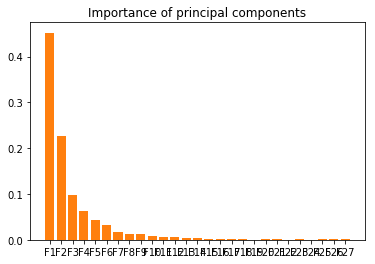

In [103]:
covmat = standardisedX.cov()
eig_val,eig_vec = np.linalg.eig(covmat)
ratio = eig_val/sum(eig_val)
x = np.arange(27) + 1
plt.bar(x,height=ratio)
plt.xticks(x, ['F' + str(i) for i in x])
plt.title('Importance of principal components')
plt.show()

In [135]:
## 3. calculate principal components
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables 
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj) 
        pc[i] = valuei
    return pc


In [136]:
# calculate first and second principal component.
pc1 = calcpc(standardisedX, eig_vec[:,0])
pc2 = calcpc(standardisedX, eig_vec[:,1])
pcadata = pd.concat([pd.DataFrame(pc1),pd.DataFrame(pc2)], axis=1)
pcadata.columns=['Comp.1','Comp.2']
pcadata.head()

,Comp.1,Comp.2
0,4.029065,-1.409100
1,3.842264,-1.699414
2,3.974759,-1.811504
3,3.455388,-1.663155
4,3.284748,-1.496735


In [140]:
dtr = tree.DecisionTreeRegressor(max_depth=3)
dtr.fit(pcadata, Y)
dot_data = StringIO()
tree.export_graphviz(dtr, out_file=dot_data,
                     feature_names=pcadata.columns,
                     class_names=['2','4'],
                     filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf("SPYTree.pdf")

True

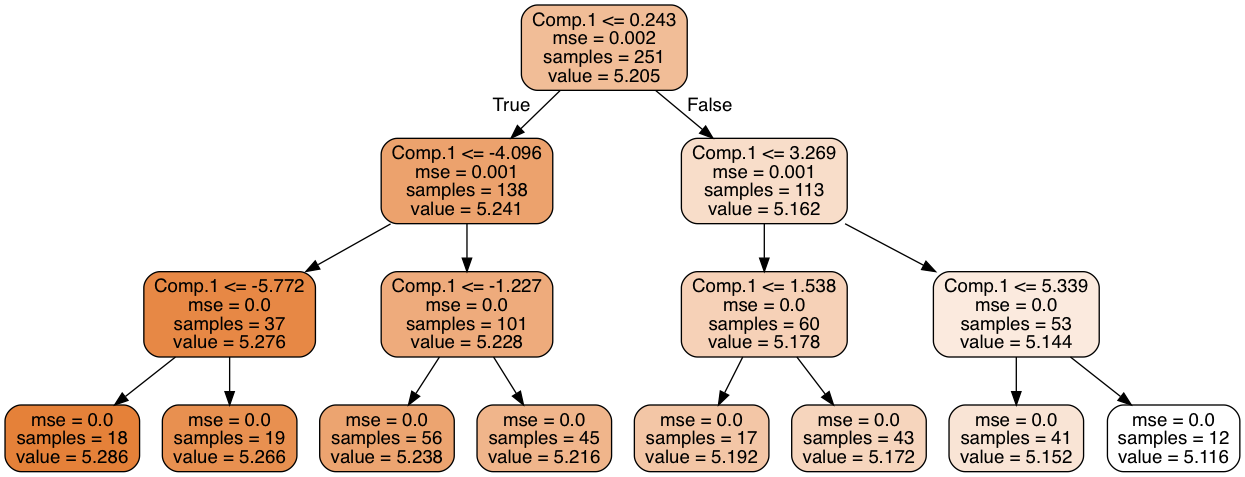

In [141]:
Image(graph.create_png())

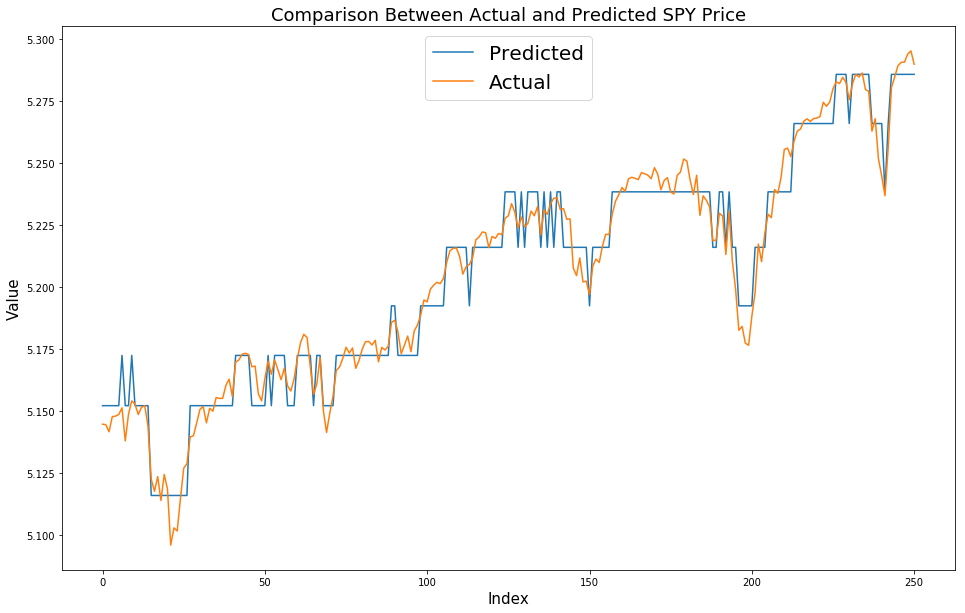

In [160]:
y_pred = dtr.predict(pcadata)
fig, ax = plt.subplots(figsize=(16, 10))
plt.plot(y_pred, label="Predicted")
plt.plot(Y, label='Actual')
plt.legend(prop={'size': 20}, loc=9)
ax.set_title("Comparison Between Actual and Predicted SPY Price", fontsize=18)
ax.set_ylabel('Value', fontsize = 15)
ax.set_xlabel('Index', fontsize=15)

plt.show()